In [1]:
# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:

# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)


Train for 14 steps, validate for 14 steps
Epoch 1/20
14/14 [==============================] - 45s 3s/step - loss: 0.6925 - acc: 0.5413 - val_loss: 0.6884 - val_acc: 0.4949
Epoch 2/20
14/14 [==============================] - 33s 2s/step - loss: 0.6742 - acc: 0.5640 - val_loss: 0.6628 - val_acc: 0.6939
Epoch 3/20
14/14 [==============================] - 32s 2s/step - loss: 0.6503 - acc: 0.6549 - val_loss: 0.6499 - val_acc: 0.6071
Epoch 4/20
14/14 [==============================] - 30s 2s/step - loss: 0.6346 - acc: 0.6435 - val_loss: 0.6395 - val_acc: 0.6480
Epoch 5/20
14/14 [==============================] - 28s 2s/step - loss: 0.6203 - acc: 0.6764 - val_loss: 0.6618 - val_acc: 0.6020
Epoch 6/20
14/14 [==============================] - 28s 2s/step - loss: 0.6073 - acc: 0.6938 - val_loss: 0.6318 - val_acc: 0.6531
Epoch 7/20
14/14 [==============================] - 28s 2s/step - loss: 0.5875 - acc: 0.6854 - val_loss: 0.6744 - val_acc: 0.6327
Epoch 8/20
14/14 [==============================

In [6]:

# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)


Train for 14 steps, validate for 14 steps
Epoch 1/20
14/14 [==============================] - 38s 3s/step - loss: 4.7336 - acc: 0.5227 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 2/20
14/14 [==============================] - 29s 2s/step - loss: 0.7113 - acc: 0.5353 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 3/20
14/14 [==============================] - 28s 2s/step - loss: 0.6990 - acc: 0.5724 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
14/14 [==============================] - 29s 2s/step - loss: 0.7474 - acc: 0.5736 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 5/20
14/14 [==============================] - 28s 2s/step - loss: 0.7109 - acc: 0.5981 - val_loss: 0.6931 - val_acc: 0.6684
Epoch 6/20
14/14 [==============================] - 28s 2s/step - loss: 0.7322 - acc: 0.6328 - val_loss: 0.6931 - val_acc: 0.4898
Epoch 7/20
14/14 [==============================] - 27s 2s/step - loss: 0.6662 - acc: 0.6196 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 8/20
14/14 [==============================

In [8]:
from tensorflow.keras.models import load_model

model.save('f_inception_201006.h5')

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 50,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_vgg_201006.h5')





# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 50,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_resnet_201006.h5')






# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 50,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_inception_201006.h5')

In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)


Train for 14 steps, validate for 14 steps
Epoch 1/20
14/14 [==============================] - 36s 3s/step - loss: 4.3987 - acc: 0.5849 - val_loss: 2.9731 - val_acc: 0.5051
Epoch 2/20
14/14 [==============================] - 28s 2s/step - loss: 0.7619 - acc: 0.7482 - val_loss: 1.1130 - val_acc: 0.5204
Epoch 3/20
14/14 [==============================] - 28s 2s/step - loss: 0.4663 - acc: 0.8110 - val_loss: 1.2830 - val_acc: 0.5561
Epoch 4/20
14/14 [==============================] - 27s 2s/step - loss: 0.3895 - acc: 0.8397 - val_loss: 0.1956 - val_acc: 0.9337
Epoch 5/20
14/14 [==============================] - 26s 2s/step - loss: 0.5123 - acc: 0.8313 - val_loss: 0.2274 - val_acc: 0.9133
Epoch 6/20
14/14 [==============================] - 27s 2s/step - loss: 0.3992 - acc: 0.8720 - val_loss: 0.4112 - val_acc: 0.8571
Epoch 7/20
14/14 [==============================] - 29s 2s/step - loss: 0.2567 - acc: 0.9067 - val_loss: 0.4687 - val_acc: 0.8929
Epoch 8/20
14/14 [==============================

KeyboardInterrupt: 

In [12]:
# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_vgg_201007_2.h5')





# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_resnet_201007_2.h5')






# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_inception_201007_2.h5')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Train for 14 steps, validate for 14 steps
Epoch 1/20
14/14 [==============================] - 36s 3s/step - loss: 0.7831 - acc: 0.6130 - f1_m: 0.6306 - precision_m: 0.6306 - recall_m: 0.6306 - val_loss: 0.4395 - val_acc: 0.8163 - val_f1_m: 0.8163 - val_precision_m: 0.8163 - val_recall_m: 0.8163
Epoch 2/20
14/14 [==============================] - 29s 2s/step - loss: 0.3801 - acc: 0.8266 - f1_m: 0.8298 - precision_m: 0.8298 - recall_m: 0.8298 - val_loss: 0.4070 - val_acc: 0.8316 - val_f1_m: 0.8316 - val_precision_m: 0.8316 - val_recall_m: 0.8316
Epoch 3/20
14/14 [==============================] - 31s 2s/step - loss: 0.2979 - acc: 0.8756 - f1_m: 0.8672 - precision_m: 0.8672 - recall_m: 0.8672 - val_loss: 0.3848 - val_acc: 0.8010 - val_f1_m: 0.8010 - val_precision_m: 0.8010 - val_recall_m: 0.8010
Epoch 4/20
14/14 [==============================] - 30s 2s/step - loss: 0.2275 - acc: 0.9025 - f1_m: 0.9090 - pre

In [2]:


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# # os.environ["CUDA_VISIBLE_DEVICES"] = '1'
# from tensorflow.keras.applications import *
# # resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# # vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
# input_tensor = Input(shape=(224, 224, 3))
# # base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# # base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(2048, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# predictions = Dense(2, activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)
# for layer in base_model.layers:
#     layer.trainable = False
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# history = model.fit(
# train_generator,
# steps_per_epoch = 14,
# epochs = 50,
# validation_data = validation_generator,
# validation_steps = 14)



from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization,Conv2D,MaxPooling2D,Activation, Flatten

# 하이퍼 파라미터를 설정한다.
batch_size = 14
num_classes = 2
epochs = 50

model = Sequential()

# 첫번째 층은 반드시 input_shape를 지정해야 한다.
# x_train.shape ( 19000, 32, 32, 3 )  /  x_train.shape[1:] = ( 32, 32, 3 )
# conv 층에 입력은 3차원이어야 한다.
# mnist의 경우 flatten시킨 후 완전연결계층으로 입력 Flatten(input_shape=(28,28) )
# convolution층은 이미지의 형상이 무시되지 않아야하기 때문에 (32,32,3) 3차원 입력

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
#           필터의 개수, (필터 가로, 세로 사이즈)
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# convolution 계층에서는 maxpooling 이후 dropout이 이상적이다.

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
# 모델 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# 데이터 정규화
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
 
# 모델 학습
hist = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=14, validation_steps=14)



# from tensorflow.keras.models import load_model

# model.save('f_vgg_201007.h5')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Train for 14 steps, validate for 14 steps
 1/14 [=>............................] - ETA: 8:52

ResourceExhaustedError:  OOM when allocating tensor with shape[128,64,109,109] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/conv2d_97/Conv2D (defined at C:\Users\knit\anaconda3\envs\keras_study4\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_55536]

Function call stack:
distributed_function


In [4]:
for i in train_generator:
    print(i)

(array([[[[9.88769948e-01, 9.96613085e-01, 9.92691517e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         ...,
         [9.96613085e-01, 9.96613085e-01, 9.96613085e-01],
         [9.99843955e-01, 9.99843955e-01, 9.99687850e-01],
         [9.92913902e-01, 9.92913902e-01, 9.85827625e-01]],

        [[9.88769948e-01, 9.96613085e-01, 9.92691517e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         ...,
         [9.96613085e-01, 9.96613085e-01, 9.96613085e-01],
         [9.99843955e-01, 9.99843955e-01, 9.99687850e-01],
         [9.92913902e-01, 9.92913902e-01, 9.85827625e-01]],

        [[9.88769948e-01, 9.96613085e-01, 9.92691517e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         [9.88235354e-01, 9.96078491e-01, 9.92156923e-01],
         ...,
         [9.96613085e-01, 9.96613085e-01, 9.96613085e-01],
         

(array([[[[0.19776793, 0.14460282, 0.11715184],
         [0.1302934 , 0.10044082, 0.07244568],
         [0.0685546 , 0.07276663, 0.04153932],
         ...,
         [0.34509087, 0.34509087, 0.37646344],
         [0.19836   , 0.20093958, 0.2219938 ],
         [0.14770034, 0.14944126, 0.15204354]],

        [[0.19776793, 0.14460282, 0.11715184],
         [0.1302934 , 0.10044082, 0.07244568],
         [0.0685546 , 0.07276663, 0.04153932],
         ...,
         [0.34509087, 0.34509087, 0.37646344],
         [0.19836   , 0.20093958, 0.2219938 ],
         [0.14770034, 0.14944126, 0.15204354]],

        [[0.19776793, 0.14460282, 0.11715184],
         [0.1302934 , 0.10044082, 0.07244568],
         [0.0685546 , 0.07276663, 0.04153932],
         ...,
         [0.34509087, 0.34509087, 0.37646344],
         [0.19836   , 0.20093958, 0.2219938 ],
         [0.14770034, 0.14944126, 0.15204354]],

        ...,

        [[0.63182044, 0.6592714 , 0.7220165 ],
         [0.5862837 , 0.61373466, 0.67647976

(array([[[[0.7019608 , 0.73333335, 0.74509805],
         [0.70080304, 0.7321756 , 0.7439403 ],
         [0.6983937 , 0.72976625, 0.74153095],
         ...,
         [0.40596008, 0.343215  , 0.28439143],
         [0.39783674, 0.33509165, 0.27626812],
         [0.3886918 , 0.32594672, 0.2671232 ]],

        [[0.7002977 , 0.73167026, 0.74343497],
         [0.6983497 , 0.72972226, 0.74148697],
         [0.69803923, 0.7294118 , 0.7411765 ],
         ...,
         [0.44226336, 0.3760614 , 0.31378105],
         [0.43414003, 0.3679381 , 0.30565774],
         [0.42423257, 0.35803062, 0.29575026]],

        [[0.70007414, 0.7314467 , 0.7432114 ],
         [0.69803923, 0.7294118 , 0.7411765 ],
         [0.69803923, 0.7294118 , 0.7411765 ],
         ...,
         [0.44691065, 0.380244  , 0.3174989 ],
         [0.43878737, 0.37212068, 0.30937558],
         [0.42877737, 0.36211067, 0.29936558]],

        ...,

        [[0.26056206, 0.22134635, 0.22526793],
         [0.2835899 , 0.24437423, 0.2482958 

(array([[[[0.27396306, 0.23680453, 0.24950144],
         [0.27396306, 0.23680453, 0.24950144],
         [0.27396306, 0.23680453, 0.24950144],
         ...,
         [0.15294118, 0.20392159, 0.13333334],
         [0.15294118, 0.20392159, 0.13333334],
         [0.15294118, 0.20392159, 0.13333334]],

        [[0.24763419, 0.20449692, 0.22018321],
         [0.24763419, 0.20449692, 0.22018321],
         [0.24763419, 0.20449692, 0.22018321],
         ...,
         [0.15294118, 0.20392159, 0.13333334],
         [0.15294118, 0.20392159, 0.13333334],
         [0.15294118, 0.20392159, 0.13333334]],

        [[0.25076193, 0.20806162, 0.22309248],
         [0.25076193, 0.20806162, 0.22309248],
         [0.25076193, 0.20806162, 0.22309248],
         ...,
         [0.15294118, 0.20392159, 0.1335518 ],
         [0.15294118, 0.20392159, 0.1335518 ],
         [0.15294118, 0.20392159, 0.1335518 ]],

        ...,

        [[0.39558318, 0.50637764, 0.41469577],
         [0.39558318, 0.50637764, 0.41469577

(array([[[[0.1286466 , 0.13648975, 0.08158777],
         [0.14039135, 0.14823449, 0.1015672 ],
         [0.14976485, 0.15760799, 0.11447072],
         ...,
         [0.11764707, 0.12156864, 0.09321687],
         [0.11764707, 0.12156864, 0.09019608],
         [0.11764707, 0.12156864, 0.09019608]],

        [[0.1286466 , 0.13648975, 0.08158777],
         [0.14039135, 0.14823449, 0.1015672 ],
         [0.14976485, 0.15760799, 0.11447072],
         ...,
         [0.11764707, 0.12156864, 0.09321687],
         [0.11764707, 0.12156864, 0.09019608],
         [0.11764707, 0.12156864, 0.09019608]],

        [[0.1286466 , 0.13648975, 0.08158777],
         [0.14039135, 0.14823449, 0.1015672 ],
         [0.14976485, 0.15760799, 0.11447072],
         ...,
         [0.11764707, 0.12156864, 0.09321687],
         [0.11764707, 0.12156864, 0.09019608],
         [0.11764707, 0.12156864, 0.09019608]],

        ...,

        [[0.31908172, 0.30731702, 0.24065036],
         [0.3494091 , 0.32940975, 0.26548797

(array([[[[0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         ...,
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085]],

        [[0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         ...,
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085]],

        [[0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         [0.8745099 , 0.8862746 , 0.9058824 ],
         ...,
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085]],

        ...,

        [[0.25846377, 0.2547021 , 0.24721874],
         [0.25846377, 0.2547021 , 0.24721874

(array([[[[0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         ...,
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294]],

        [[0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         ...,
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294]],

        [[0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         [0.28235295, 0.21568629, 0.10588236],
         ...,
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294],
         [0.19215688, 0.19215688, 0.08235294]],

        ...,

        [[0.10196079, 0.09803922, 0.07843138],
         [0.10196079, 0.09803922, 0.07843138

(array([[[[0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         ...,
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316]],

        [[0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         ...,
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316]],

        [[0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         [0.64705884, 0.654902  , 0.63529414],
         ...,
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316],
         [0.6117647 , 0.6313726 , 0.60784316]],

        ...,

        [[0.06786906, 0.1266926 , 0.05218279],
         [0.06438127, 0.11829629, 0.04215031

(array([[[[0.20439403, 0.02352941, 0.0669029 ],
         [0.20439403, 0.02352941, 0.0669029 ],
         [0.20439403, 0.02352941, 0.0669029 ],
         ...,
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157]],

        [[0.21174496, 0.02352941, 0.07057836],
         [0.21174496, 0.02352941, 0.07057836],
         [0.21174496, 0.02352941, 0.07057836],
         ...,
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157]],

        [[0.21176472, 0.02352941, 0.07058824],
         [0.21176472, 0.02352941, 0.07058824],
         [0.21176472, 0.02352941, 0.07058824],
         ...,
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157],
         [0.01568628, 0.01176471, 0.00392157]],

        ...,

        [[0.12156864, 0.00784314, 0.        ],
         [0.12156864, 0.00784314, 0.        

(array([[[[0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         ...,
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ]],

        [[0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         ...,
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ]],

        [[0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         ...,
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ]],

        ...,

        [[0.6666667 , 0.6       , 0.5294118 ],
         [0.6666667 , 0.6       , 0.5294118 

(array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        

(array([[[[0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         ...,
         [0.6924096 , 0.83750767, 0.8100567 ],
         [0.7019608 , 0.8470589 , 0.8196079 ],
         [0.7019608 , 0.8470589 , 0.8196079 ]],

        [[0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         ...,
         [0.6924096 , 0.83750767, 0.8100567 ],
         [0.7019608 , 0.8470589 , 0.8196079 ],
         [0.7019608 , 0.8470589 , 0.8196079 ]],

        [[0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         [0.6901961 , 0.82745105, 0.80392164],
         ...,
         [0.6924096 , 0.83750767, 0.8100567 ],
         [0.7019608 , 0.8470589 , 0.8196079 ],
         [0.7019608 , 0.8470589 , 0.8196079 ]],

        ...,

        [[0.52156866, 0.7176471 , 0.72156864],
         [0.52156866, 0.7176471 , 0.72156864

(array([[[[0.22402467, 0.20441681, 0.1926521 ],
         [0.22402467, 0.20441681, 0.1926521 ],
         [0.22402467, 0.20441681, 0.1926521 ],
         ...,
         [0.22164029, 0.18634616, 0.15105204],
         [0.2134779 , 0.17818378, 0.14288965],
         [0.2134779 , 0.17818378, 0.14288965]],

        [[0.2180842 , 0.19847636, 0.18671165],
         [0.2180842 , 0.19847636, 0.18671165],
         [0.2180842 , 0.19847636, 0.18671165],
         ...,
         [0.2266528 , 0.19288231, 0.15454091],
         [0.21568629, 0.18191582, 0.1435744 ],
         [0.21568629, 0.18191582, 0.1435744 ]],

        [[0.21435216, 0.19474432, 0.18297961],
         [0.21435216, 0.19474432, 0.18297961],
         [0.21435216, 0.19474432, 0.18297961],
         ...,
         [0.22978862, 0.19841605, 0.1552788 ],
         [0.2170204 , 0.18564786, 0.14251061],
         [0.2170204 , 0.18564786, 0.14251061]],

        ...,

        [[0.3803922 , 0.34509805, 0.3254902 ],
         [0.3803922 , 0.34509805, 0.3254902 

(array([[[[0.53864783, 0.46021643, 0.43276545],
         [0.53864783, 0.46021643, 0.43276545],
         [0.53864783, 0.46021643, 0.43276545],
         ...,
         [0.4389586 , 0.35939145, 0.3383907 ],
         [0.4389586 , 0.35939145, 0.3383907 ],
         [0.4389586 , 0.35939145, 0.3383907 ]],

        [[0.5451882 , 0.46080688, 0.43137258],
         [0.5451882 , 0.46080688, 0.43137258],
         [0.5451882 , 0.46080688, 0.43137258],
         ...,
         [0.45107058, 0.36276764, 0.3451431 ],
         [0.45107058, 0.36276764, 0.3451431 ],
         [0.45107058, 0.36276764, 0.3451431 ]],

        [[0.55437917, 0.4641831 , 0.43281054],
         [0.55437917, 0.4641831 , 0.43281054],
         [0.55437917, 0.4641831 , 0.43281054],
         ...,
         [0.4473198 , 0.35320216, 0.3375159 ],
         [0.4473198 , 0.35320216, 0.3375159 ],
         [0.4473198 , 0.35320216, 0.3375159 ]],

        ...,

        [[0.10945667, 0.11983233, 0.14048195],
         [0.10945667, 0.11983233, 0.14048195

(array([[[[0.25192368, 0.21804564, 0.19509771],
         [0.26623893, 0.23094481, 0.20447746],
         [0.26200244, 0.2297796 , 0.1998716 ],
         ...,
         [0.5833503 , 0.6215878 , 0.65108174],
         [0.5773763 , 0.61678857, 0.6421805 ],
         [0.5731553 , 0.61124104, 0.6334732 ]],

        [[0.24983773, 0.21886429, 0.18674849],
         [0.26141128, 0.22821802, 0.200634  ],
         [0.26721203, 0.2319179 , 0.20696212],
         ...,
         [0.58994883, 0.6257313 , 0.6523236 ],
         [0.5786492 , 0.61837053, 0.6436079 ],
         [0.575076  , 0.6143902 , 0.63600814]],

        [[0.25134176, 0.22367266, 0.18917699],
         [0.26051402, 0.22929741, 0.20317976],
         [0.27487725, 0.24191883, 0.21466687],
         ...,
         [0.58398384, 0.61670125, 0.6442789 ],
         [0.5751691 , 0.6121856 , 0.6366884 ],
         [0.56540513, 0.59992754, 0.626277  ]],

        ...,

        [[0.24030656, 0.17639825, 0.11365315],
         [0.24450311, 0.17783643, 0.11021267

(array([[[[5.72248042e-01, 8.00201237e-01, 8.27542782e-01],
         [5.78024328e-01, 8.02535892e-01, 8.33737433e-01],
         [5.84733605e-01, 8.08263004e-01, 8.42476606e-01],
         ...,
         [1.23548351e-01, 2.42913991e-01, 3.43755454e-01],
         [1.19626835e-01, 2.25643784e-01, 3.33308786e-01],
         [7.89095163e-02, 1.72543570e-01, 2.85260320e-01]],

        [[6.16591275e-01, 8.42441976e-01, 8.67452025e-01],
         [6.27369642e-01, 8.46544564e-01, 8.80710602e-01],
         [6.30912125e-01, 8.47952962e-01, 8.85409951e-01],
         ...,
         [1.31966695e-01, 2.56578326e-01, 3.54790390e-01],
         [1.24516428e-01, 2.33569592e-01, 3.43702912e-01],
         [8.00160989e-02, 1.72908440e-01, 2.92598367e-01]],

        [[6.57345057e-01, 8.85093093e-01, 9.03370321e-01],
         [6.77746415e-01, 8.95277798e-01, 9.22385812e-01],
         [6.83406711e-01, 8.94647062e-01, 9.25587356e-01],
         ...,
         [1.36790678e-01, 2.63415456e-01, 3.66926312e-01],
         

(array([[[[0.6190846 , 0.6465356 , 0.70928067],
         [0.6258169 , 0.6501634 , 0.70669943],
         [0.6300001 , 0.6535295 , 0.70333326],
         ...,
         [0.8117648 , 0.89019614, 0.9932019 ],
         [0.80983686, 0.89019614, 0.9960785 ],
         [0.8037258 , 0.89294106, 0.99745095]],

        [[0.6190846 , 0.6465356 , 0.70928067],
         [0.6258169 , 0.6501634 , 0.70669943],
         [0.6300001 , 0.6535295 , 0.70333326],
         ...,
         [0.8117648 , 0.89019614, 0.9932019 ],
         [0.80983686, 0.89019614, 0.9960785 ],
         [0.8037258 , 0.89294106, 0.99745095]],

        [[0.6190846 , 0.6465356 , 0.70928067],
         [0.6258169 , 0.6501634 , 0.70669943],
         [0.6300001 , 0.6535295 , 0.70333326],
         ...,
         [0.8117648 , 0.89019614, 0.9932019 ],
         [0.80983686, 0.89019614, 0.9960785 ],
         [0.8037258 , 0.89294106, 0.99745095]],

        ...,

        [[0.7537262 , 0.71843207, 0.68313795],
         [0.7622548 , 0.72696066, 0.69166654

(array([[[[0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         ...,
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ]],

        [[0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         ...,
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ]],

        [[0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         [0.86666673, 0.8980393 , 0.909804  ],
         ...,
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ],
         [0.8313726 , 0.89019614, 0.909804  ]],

        ...,

        [[0.0509804 , 0.04313726, 0.05490196],
         [0.0509804 , 0.04313726, 0.05490196

(array([[[[0.4583461 , 0.54901963, 0.58015347],
         [0.4583461 , 0.54901963, 0.58015347],
         [0.4583461 , 0.54901963, 0.58015347],
         ...,
         [0.40095496, 0.5068373 , 0.5813471 ],
         [0.40095496, 0.5068373 , 0.5813471 ],
         [0.40095496, 0.5068373 , 0.5813471 ]],

        [[0.45155296, 0.54901963, 0.5767569 ],
         [0.45155296, 0.54901963, 0.5767569 ],
         [0.45155296, 0.54901963, 0.5767569 ],
         ...,
         [0.41454124, 0.5204236 , 0.5949334 ],
         [0.41454124, 0.5204236 , 0.5949334 ],
         [0.41454124, 0.5204236 , 0.5949334 ]],

        [[0.44164953, 0.54590935, 0.5733603 ],
         [0.44164953, 0.54590935, 0.5733603 ],
         [0.44164953, 0.54590935, 0.5733603 ],
         ...,
         [0.4187966 , 0.5308996 , 0.6022991 ],
         [0.4187966 , 0.5308996 , 0.6022991 ],
         [0.4187966 , 0.5308996 , 0.6022991 ]],

        ...,

        [[0.3226337 , 0.31871215, 0.2991043 ],
         [0.3226337 , 0.31871215, 0.2991043 

(array([[[[0.4210275 , 0.41173616, 0.41565773],
         [0.41794667, 0.40865532, 0.41257688],
         [0.4146611 , 0.4053698 , 0.40929136],
         ...,
         [0.8169506 , 0.79040736, 0.7291105 ],
         [0.797436  , 0.7738561 , 0.7125592 ],
         [0.7769873 , 0.7641758 , 0.6934804 ]],

        [[0.43174165, 0.41605538, 0.41997695],
         [0.4311056 , 0.41541934, 0.4193409 ],
         [0.4278201 , 0.4121338 , 0.41605538],
         ...,
         [0.8128144 , 0.789285  , 0.73512125],
         [0.7880571 , 0.7645277 , 0.71036386],
         [0.77368134, 0.76053345, 0.7031333 ]],

        [[0.43531895, 0.4196112 , 0.4235435 ],
         [0.43467447, 0.4189836 , 0.42290744],
         [0.43139818, 0.4156863 , 0.41962066],
         ...,
         [0.83828825, 0.8147846 , 0.76774055],
         [0.82014185, 0.79659903, 0.7495681 ],
         [0.80908936, 0.7927039 , 0.7456604 ]],

        ...,

        [[0.21828923, 0.19983362, 0.16546261],
         [0.21834847, 0.1896254 , 0.15888889

(array([[[[0.6322825 , 0.65071666, 0.5324827 ],
         [0.6374076 , 0.655433  , 0.5371991 ],
         [0.6456461 , 0.6629065 , 0.54467255],
         ...,
         [0.6005489 , 0.5860364 , 0.43642995],
         [0.6039659 , 0.58945334, 0.43984684],
         [0.604322  , 0.59241223, 0.43408138]],

        [[0.6279112 , 0.6473822 , 0.5371948 ],
         [0.6304535 , 0.65404725, 0.539225  ],
         [0.63598937, 0.66151017, 0.5409066 ],
         ...,
         [0.6098711 , 0.5971413 , 0.4392523 ],
         [0.610712  , 0.5979822 , 0.44009316],
         [0.6131072 , 0.60113066, 0.44098184]],

        [[0.6301486 , 0.6521532 , 0.53666604],
         [0.6279187 , 0.65269876, 0.5346546 ],
         [0.62938404, 0.6516785 , 0.53268814],
         ...,
         [0.614343  , 0.6025783 , 0.44179398],
         [0.614343  , 0.6025783 , 0.44179398],
         [0.6174038 , 0.6056391 , 0.44083008]],

        ...,

        [[0.20000002, 0.2186548 , 0.14108   ],
         [0.20136543, 0.22097327, 0.13834235

(array([[[[9.96078491e-01, 1.00000000e+00, 1.00000000e+00],
         [9.97154593e-01, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [9.85435486e-01, 1.00000000e+00, 1.00000000e+00],
         [9.87067938e-01, 1.00000000e+00, 1.00000000e+00],
         [9.88235354e-01, 1.00000000e+00, 1.00000000e+00]],

        [[9.96078491e-01, 1.00000000e+00, 1.00000000e+00],
         [9.97154593e-01, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [9.85435486e-01, 1.00000000e+00, 1.00000000e+00],
         [9.87067938e-01, 1.00000000e+00, 1.00000000e+00],
         [9.88235354e-01, 1.00000000e+00, 1.00000000e+00]],

        [[9.96078491e-01, 1.00000000e+00, 1.00000000e+00],
         [9.97154593e-01, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [9.85435486e-01, 1.00000000e+00, 1.00000000e+00],
         

(array([[[[0.8366709 , 0.84059244, 0.8585399 ],
         [0.91668785, 0.9192124 , 0.9293109 ],
         [0.9501258 , 0.9501258 , 0.9501258 ],
         ...,
         [0.19653735, 0.20830205, 0.17300794],
         [0.18224217, 0.19400689, 0.15871276],
         [0.17300208, 0.18476678, 0.14947267]],

        [[0.84280133, 0.8467229 , 0.8643244 ],
         [0.92457664, 0.9271012 , 0.93667376],
         [0.95532066, 0.95532066, 0.95532066],
         ...,
         [0.19603328, 0.20779799, 0.17250387],
         [0.18305142, 0.19481613, 0.159522  ],
         [0.17304929, 0.18481399, 0.14951986]],

        [[0.8972819 , 0.90120345, 0.91575533],
         [0.9924455 , 0.99497014, 0.99996865],
         [0.9998118 , 0.9998118 , 0.9999373 ],
         ...,
         [0.19155882, 0.20332353, 0.16802941],
         [0.19010472, 0.20186943, 0.1665753 ],
         [0.17388625, 0.18565096, 0.15035684]],

        ...,

        [[0.3899483 , 0.401713  , 0.429164  ],
         [0.3961262 , 0.40730086, 0.4349485 

(array([[[[6.88286126e-01, 6.11832500e-01, 5.84381521e-01],
         [6.88286126e-01, 6.11832500e-01, 5.84381521e-01],
         [6.88286126e-01, 6.11832500e-01, 5.84381521e-01],
         ...,
         [4.15652424e-01, 3.62762064e-01, 3.72549027e-01],
         [4.15652424e-01, 3.62762064e-01, 3.72549027e-01],
         [4.15652424e-01, 3.62762064e-01, 3.72549027e-01]],

        [[6.90197408e-01, 6.15687609e-01, 5.88236630e-01],
         [6.90197408e-01, 6.15687609e-01, 5.88236630e-01],
         [6.90197408e-01, 6.15687609e-01, 5.88236630e-01],
         ...,
         [4.11764741e-01, 3.64705890e-01, 3.72549027e-01],
         [4.11764741e-01, 3.64705890e-01, 3.72549027e-01],
         [4.11764741e-01, 3.64705890e-01, 3.72549027e-01]],

        [[6.74619198e-01, 6.02051973e-01, 5.68773329e-01],
         [6.74619198e-01, 6.02051973e-01, 5.68773329e-01],
         [6.74619198e-01, 6.02051973e-01, 5.68773329e-01],
         ...,
         [4.07879591e-01, 3.60820770e-01, 3.68663907e-01],
         

(array([[[[0.3647059 , 0.34509805, 0.25882354],
         [0.3601976 , 0.34058973, 0.25431523],
         [0.33995083, 0.319669  , 0.23204654],
         ...,
         [0.4096855 , 0.392771  , 0.34448394],
         [0.37446928, 0.358783  , 0.31506157],
         [0.36862746, 0.3529412 , 0.30980393]],

        [[0.3647059 , 0.34509805, 0.25882354],
         [0.3601976 , 0.34058973, 0.25431523],
         [0.33995083, 0.319669  , 0.23204654],
         ...,
         [0.4096855 , 0.392771  , 0.34448394],
         [0.37446928, 0.358783  , 0.31506157],
         [0.36862746, 0.3529412 , 0.30980393]],

        [[0.3647059 , 0.34509805, 0.25882354],
         [0.3601976 , 0.34058973, 0.25431523],
         [0.33995083, 0.319669  , 0.23204654],
         ...,
         [0.4096855 , 0.392771  , 0.34448394],
         [0.37446928, 0.358783  , 0.31506157],
         [0.36862746, 0.3529412 , 0.30980393]],

        ...,

        [[0.28627452, 0.27450982, 0.20784315],
         [0.2843424 , 0.2725777 , 0.20591101

(array([[[[0.10901728, 0.11293885, 0.08940944],
         [0.10901728, 0.11293885, 0.08940944],
         [0.10901728, 0.11293885, 0.08940944],
         ...,
         [0.3733357 , 0.42078784, 0.44431725],
         [0.3733357 , 0.42078784, 0.44431725],
         [0.3733357 , 0.42078784, 0.44431725]],

        [[0.11250632, 0.11642788, 0.09289847],
         [0.11250632, 0.11642788, 0.09289847],
         [0.11250632, 0.11642788, 0.09289847],
         ...,
         [0.3647059 , 0.40784317, 0.42794544],
         [0.3647059 , 0.40784317, 0.42794544],
         [0.3647059 , 0.40784317, 0.42794544]],

        [[0.10754541, 0.11146697, 0.08793756],
         [0.10754541, 0.11146697, 0.08793756],
         [0.10754541, 0.11146697, 0.08793756],
         ...,
         [0.37468415, 0.41782144, 0.43018162],
         [0.37468415, 0.41782144, 0.43018162],
         [0.37468415, 0.41782144, 0.43018162]],

        ...,

        [[0.27696934, 0.32163528, 0.34908625],
         [0.27696934, 0.32163528, 0.34908625

(array([[[[0.11339368, 0.07025642, 0.09378584],
         [0.1137255 , 0.07058824, 0.09411766],
         [0.11089673, 0.06775947, 0.09128888],
         ...,
         [0.06666667, 0.01960784, 0.02745098],
         [0.06519338, 0.02108114, 0.02745098],
         [0.0616523 , 0.02243661, 0.02635818]],

        [[0.11339368, 0.07025642, 0.09378584],
         [0.1137255 , 0.07058824, 0.09411766],
         [0.11089673, 0.06775947, 0.09128888],
         ...,
         [0.06666667, 0.01960784, 0.02745098],
         [0.06519338, 0.02108114, 0.02745098],
         [0.0616523 , 0.02243661, 0.02635818]],

        [[0.11339368, 0.07025642, 0.09378584],
         [0.1137255 , 0.07058824, 0.09411766],
         [0.11089673, 0.06775947, 0.09128888],
         ...,
         [0.06666667, 0.01960784, 0.02745098],
         [0.06519338, 0.02108114, 0.02745098],
         [0.0616523 , 0.02243661, 0.02635818]],

        ...,

        [[0.14708894, 0.0507088 , 0.03043732],
         [0.12905174, 0.01817548, 0.00498616

(array([[[[9.65162337e-01, 8.71484041e-01, 7.87428916e-01],
         [6.94370747e-01, 6.73060775e-01, 5.27555704e-01],
         [6.76124156e-01, 6.34378731e-01, 5.67499399e-01],
         ...,
         [5.36584079e-01, 5.05200863e-01, 3.80230695e-01],
         [5.53227425e-01, 4.98810172e-01, 3.68627459e-01],
         [5.41904867e-01, 4.95836824e-01, 3.81265819e-01]],

        [[9.03726518e-01, 8.84692550e-01, 7.75202036e-01],
         [7.23603129e-01, 5.91404796e-01, 4.89948392e-01],
         [6.85248613e-01, 6.30787730e-01, 5.54425895e-01],
         ...,
         [5.59980571e-01, 5.03866374e-01, 4.00901705e-01],
         [5.27020097e-01, 4.79843885e-01, 3.65870982e-01],
         [4.91812110e-01, 4.46137130e-01, 3.63712549e-01]],

        [[7.90836275e-01, 7.78904557e-01, 6.72951102e-01],
         [9.29336727e-01, 8.97953570e-01, 8.12529266e-01],
         [6.25472128e-01, 6.37844801e-01, 5.43822885e-01],
         ...,
         [4.51299518e-01, 4.29442346e-01, 3.59896094e-01],
         

(array([[[[0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         ...,
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594]],

        [[0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         ...,
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594]],

        [[0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         [0.854902  , 0.80392164, 0.67058825],
         ...,
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594],
         [0.8470589 , 0.9176471 , 0.96470594]],

        ...,

        [[0.01176471, 0.04705883, 0.07450981],
         [0.01176471, 0.04705883, 0.07450981

(array([[[[0.07641695, 0.0058287 , 0.05288753],
         [0.07671549, 0.00612725, 0.05318607],
         [0.07450981, 0.00392157, 0.0509804 ],
         ...,
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412]],

        [[0.07641695, 0.0058287 , 0.05288753],
         [0.07671549, 0.00612725, 0.05318607],
         [0.07450981, 0.00392157, 0.0509804 ],
         ...,
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412]],

        [[0.07641695, 0.0058287 , 0.05288753],
         [0.07671549, 0.00612725, 0.05318607],
         [0.07450981, 0.00392157, 0.0509804 ],
         ...,
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412],
         [0.08627451, 0.01176471, 0.03529412]],

        ...,

        [[0.09019608, 0.01176471, 0.05882353],
         [0.09019608, 0.01176471, 0.05882353

(array([[[[0.51920277, 0.51920277, 0.51920277],
         [0.31546998, 0.31946227, 0.31746614],
         [0.06256045, 0.07040358, 0.06648201],
         ...,
         [0.11791715, 0.11791715, 0.11791715],
         [0.11457149, 0.11457149, 0.11457149],
         [0.1885866 , 0.1885866 , 0.1885866 ]],

        [[0.48996776, 0.48996776, 0.48996776],
         [0.2700907 , 0.27233046, 0.27033433],
         [0.18808945, 0.19400606, 0.19008449],
         ...,
         [0.12946318, 0.12946318, 0.12946318],
         [0.14200743, 0.14200743, 0.14200743],
         [0.23981161, 0.23981161, 0.23981161]],

        [[0.38884798, 0.38884798, 0.38884798],
         [0.23900571, 0.24257754, 0.2405814 ],
         [0.25208443, 0.25946534, 0.25554377],
         ...,
         [0.14593191, 0.14593191, 0.14593191],
         [0.15048975, 0.15048975, 0.15048975],
         [0.16739182, 0.16739182, 0.16739182]],

        ...,

        [[0.3853278 , 0.36179838, 0.36179838],
         [0.3823176 , 0.36278048, 0.36322832

(array([[[[0.11982308, 0.06099954, 0.03354856],
         [0.1212507 , 0.06242718, 0.0349762 ],
         [0.12156864, 0.0627451 , 0.03529412],
         ...,
         [0.08984292, 0.18661165, 0.19686736],
         [0.08582503, 0.1799427 , 0.18456094],
         [0.08380487, 0.17792252, 0.17792252]],

        [[0.1206641 , 0.06184057, 0.03438959],
         [0.12156864, 0.0627451 , 0.03529412],
         [0.12156864, 0.0627451 , 0.03529412],
         ...,
         [0.09042083, 0.18661165, 0.19860111],
         [0.08627451, 0.18039216, 0.18501042],
         [0.08489805, 0.1790157 , 0.1790157 ]],

        [[0.12622032, 0.06184057, 0.03438959],
         [0.12712486, 0.0627451 , 0.03529412],
         [0.12892784, 0.06454809, 0.03709712],
         ...,
         [0.08895217, 0.19216786, 0.20137922],
         [0.08627451, 0.18594839, 0.19007309],
         [0.08489805, 0.1845719 , 0.18735002]],

        ...,

        [[0.0512696 , 0.06303431, 0.08264215],
         [0.05495521, 0.06671991, 0.08632775

(array([[[[0.69627494, 0.73156905, 0.71980435],
         [0.69627494, 0.73156905, 0.71980435],
         [0.69627494, 0.73156905, 0.71980435],
         ...,
         [0.5772195 , 0.6158471 , 0.6024157 ],
         [0.57374877, 0.61237633, 0.5989449 ],
         [0.57578135, 0.61440897, 0.6009775 ]],

        [[0.6949349 , 0.7345592 , 0.7206294 ],
         [0.6949349 , 0.7345592 , 0.7206294 ],
         [0.6949349 , 0.7345592 , 0.7206294 ],
         ...,
         [0.5819573 , 0.62374663, 0.60981685],
         [0.58038795, 0.62217736, 0.6082475 ],
         [0.58001965, 0.62180895, 0.6078792 ]],

        [[0.70818675, 0.75132406, 0.7356377 ],
         [0.70818675, 0.75132406, 0.7356377 ],
         [0.70818675, 0.75132406, 0.7356377 ],
         ...,
         [0.5891458 , 0.62997866, 0.6163677 ],
         [0.59280336, 0.6336362 , 0.6200252 ],
         [0.58926827, 0.63010114, 0.6164902 ]],

        ...,

        [[0.434253  , 0.461704  , 0.4852334 ],
         [0.41154134, 0.43899232, 0.46252176

(array([[[[4.94925171e-01, 5.73356509e-01, 6.16493762e-01],
         [5.12396336e-01, 5.90827703e-01, 6.33964956e-01],
         [5.16953945e-01, 5.95385313e-01, 6.38522565e-01],
         ...,
         [8.43137324e-01, 1.00000000e+00, 9.88235354e-01],
         [8.43137324e-01, 1.00000000e+00, 9.88235354e-01],
         [8.46042693e-01, 1.00000000e+00, 9.88235354e-01]],

        [[4.94925171e-01, 5.73356509e-01, 6.16493762e-01],
         [5.12396336e-01, 5.90827703e-01, 6.33964956e-01],
         [5.14078379e-01, 5.92509747e-01, 6.35646999e-01],
         ...,
         [8.46630275e-01, 1.00000000e+00, 9.88235354e-01],
         [8.46630275e-01, 1.00000000e+00, 9.88235354e-01],
         [8.46947789e-01, 1.00000000e+00, 9.88235354e-01]],

        [[4.94925171e-01, 5.73356509e-01, 6.16493762e-01],
         [5.12396336e-01, 5.90827703e-01, 6.33964956e-01],
         [5.13725519e-01, 5.92156887e-01, 6.35294139e-01],
         ...,
         [8.47058892e-01, 1.00000000e+00, 9.88235354e-01],
         

(array([[[[0.37647063, 0.5294118 , 0.5254902 ],
         [0.37647063, 0.5294118 , 0.5254902 ],
         [0.37647063, 0.5294118 , 0.5254902 ],
         ...,
         [0.31376123, 0.42748672, 0.41964358],
         [0.31376123, 0.42748672, 0.41964358],
         [0.31376123, 0.42748672, 0.41964358]],

        [[0.37979904, 0.53274024, 0.52881867],
         [0.37979904, 0.53274024, 0.52881867],
         [0.37979904, 0.53274024, 0.52881867],
         ...,
         [0.3270392 , 0.44076473, 0.4329216 ],
         [0.3270392 , 0.44076473, 0.4329216 ],
         [0.3270392 , 0.44076473, 0.4329216 ]],

        [[0.37762117, 0.53056234, 0.5266408 ],
         [0.37762117, 0.53056234, 0.5266408 ],
         [0.37762117, 0.53056234, 0.5266408 ],
         ...,
         [0.3127857 , 0.42651123, 0.41866806],
         [0.3127857 , 0.42651123, 0.41866806],
         [0.3127857 , 0.42651123, 0.41866806]],

        ...,

        [[0.07782216, 0.08958687, 0.01960784],
         [0.07782216, 0.08958687, 0.01960784

(array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846],
         [0.18823531, 0.31764707, 0.59607846]],

        ...,

        [[0.20784315, 0.20784315, 0.16078432],
         [0.20784315, 0.20784315, 0.16078432

(array([[[[5.09803951e-01, 4.74818528e-01, 4.15531933e-01],
         [5.09803951e-01, 4.81613159e-01, 4.12134618e-01],
         [5.06776571e-01, 4.79325533e-01, 4.14792150e-01],
         ...,
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01],
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01],
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01]],

        [[5.09042442e-01, 4.74030256e-01, 4.14877713e-01],
         [5.07272422e-01, 4.78464812e-01, 4.12070394e-01],
         [5.05629599e-01, 4.77497578e-01, 4.15317923e-01],
         ...,
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01],
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01],
         [4.27295715e-01, 4.15531009e-01, 3.88080031e-01]],

        [[5.04848957e-01, 4.68999088e-01, 4.12642568e-01],
         [4.97732967e-01, 4.65280384e-01, 4.16333735e-01],
         [4.63541865e-01, 4.32007402e-01, 3.81674677e-01],
         ...,
         [4.27451015e-01, 4.15686309e-01, 3.88235331e-01],
         

(array([[[[0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         ...,
         [0.01960784, 0.00392157, 0.3019608 ],
         [0.01960784, 0.00392157, 0.3019608 ],
         [0.01960784, 0.00392157, 0.3019608 ]],

        [[0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         ...,
         [0.01960784, 0.00392157, 0.30574584],
         [0.01960784, 0.00392157, 0.30574584],
         [0.01960784, 0.00392157, 0.30574584]],

        [[0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         [0.02745098, 0.01960784, 0.1764706 ],
         ...,
         [0.01960784, 0.00392157, 0.30588236],
         [0.01960784, 0.00392157, 0.30588236],
         [0.01960784, 0.00392157, 0.30588236]],

        ...,

        [[0.703753  , 0.3814966 , 0.19752675],
         [0.703753  , 0.3814966 , 0.19752675

(array([[[[0.9490197 , 0.9568628 , 0.93725497],
         [0.9574887 , 0.98015267, 0.9626621 ],
         [0.94123805, 0.9935998 , 0.9736466 ],
         ...,
         [0.38864535, 0.3062924 , 0.36511594],
         [0.38076985, 0.2984169 , 0.35724044],
         [0.37647063, 0.29411766, 0.3529412 ]],

        [[0.9490197 , 0.9568628 , 0.93725497],
         [0.9574887 , 0.98015267, 0.9626621 ],
         [0.94123805, 0.9935998 , 0.9736466 ],
         ...,
         [0.38864535, 0.3062924 , 0.36511594],
         [0.38076985, 0.2984169 , 0.35724044],
         [0.37647063, 0.29411766, 0.3529412 ]],

        [[0.9490197 , 0.9568628 , 0.93725497],
         [0.9574887 , 0.98015267, 0.9626621 ],
         [0.94123805, 0.9935998 , 0.9736466 ],
         ...,
         [0.38864535, 0.3062924 , 0.36511594],
         [0.38076985, 0.2984169 , 0.35724044],
         [0.37647063, 0.29411766, 0.3529412 ]],

        ...,

        [[0.227451  , 0.21960786, 0.3137255 ],
         [0.23380278, 0.22172512, 0.3137255 

(array([[[[0.48750493, 0.14258793, 0.04865134],
         [0.48750493, 0.14258793, 0.04865134],
         [0.48750493, 0.14258793, 0.04865134],
         ...,
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255]],

        [[0.4156863 , 0.08235294, 0.        ],
         [0.4156863 , 0.08235294, 0.        ],
         [0.4156863 , 0.08235294, 0.        ],
         ...,
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255]],

        [[0.40651914, 0.07929722, 0.00101857],
         [0.40651914, 0.07929722, 0.00101857],
         [0.40651914, 0.07929722, 0.00101857],
         ...,
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255],
         [0.12156864, 0.04705883, 0.03137255]],

        ...,

        [[0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471

(array([[[[0.6127854 , 0.44407353, 0.2457772 ],
         [0.6127854 , 0.44407353, 0.2457772 ],
         [0.6127854 , 0.44407353, 0.2457772 ],
         ...,
         [0.36393848, 0.26121026, 0.1740839 ],
         [0.36393848, 0.26121026, 0.1740839 ],
         [0.36393848, 0.26121026, 0.1740839 ]],

        [[0.642286  , 0.46348482, 0.26820183],
         [0.642286  , 0.46348482, 0.26820183],
         [0.642286  , 0.46348482, 0.26820183],
         ...,
         [0.3615798 , 0.2627451 , 0.17567514],
         [0.3615798 , 0.2627451 , 0.17567514],
         [0.3615798 , 0.2627451 , 0.17567514]],

        [[0.66564727, 0.482157  , 0.26749018],
         [0.66564727, 0.482157  , 0.26749018],
         [0.66564727, 0.482157  , 0.26749018],
         ...,
         [0.36078432, 0.26584318, 0.17337254],
         [0.36078432, 0.26584318, 0.17337254],
         [0.36078432, 0.26584318, 0.17337254]],

        ...,

        [[0.7246107 , 0.7446948 , 0.7873558 ],
         [0.7246107 , 0.7446948 , 0.7873558 

(array([[[[1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         ...,
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533]],

        [[1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         ...,
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533]],

        [[1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         [1.        , 0.9921569 , 0.9960785 ],
         ...,
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533],
         [0.53333336, 0.4666667 , 0.38823533]],

        ...,

        [[0.21176472, 0.13725491, 0.1137255 ],
         [0.21176472, 0.13725491, 0.1137255 

(array([[[[0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         ...,
         [0.46801752, 0.47978222, 0.4444881 ],
         [0.56711733, 0.57888204, 0.5435879 ],
         [0.622844  , 0.6346087 , 0.5993146 ]],

        [[0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         ...,
         [0.46801752, 0.47978222, 0.4444881 ],
         [0.56711733, 0.57888204, 0.5435879 ],
         [0.622844  , 0.6346087 , 0.5993146 ]],

        [[0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         [0.7058824 , 0.70980394, 0.6901961 ],
         ...,
         [0.46801752, 0.47978222, 0.4444881 ],
         [0.56711733, 0.57888204, 0.5435879 ],
         [0.622844  , 0.6346087 , 0.5993146 ]],

        ...,

        [[0.6039216 , 0.6117647 , 0.5921569 ],
         [0.6033633 , 0.6112064 , 0.5915986 

(array([[[[0.1567801 , 0.1726317 , 0.22945312],
         [0.15912595, 0.15867718, 0.22081748],
         [0.15546544, 0.14370073, 0.2103674 ],
         ...,
         [0.38991886, 0.36943585, 0.4966764 ],
         [0.42898953, 0.41495234, 0.5376572 ],
         [0.41144887, 0.39968416, 0.52125275]],

        [[0.1567801 , 0.1726317 , 0.22945312],
         [0.16030045, 0.15985169, 0.22199199],
         [0.15725319, 0.14548849, 0.21215515],
         ...,
         [0.3525499 , 0.33638197, 0.46146497],
         [0.40830183, 0.39587405, 0.51777416],
         [0.42696416, 0.41519946, 0.5367681 ]],

        [[0.1567801 , 0.1726317 , 0.22945312],
         [0.16078432, 0.16033556, 0.22247586],
         [0.15798971, 0.146225  , 0.21289167],
         ...,
         [0.33715475, 0.32276455, 0.4469587 ],
         [0.39977896, 0.38801426, 0.5095829 ],
         [0.4333561 , 0.4215914 , 0.54316   ]],

        ...,

        [[0.3314139 , 0.32357076, 0.4176884 ],
         [0.32277825, 0.31161836, 0.4073944 

(array([[[[0.39217883, 0.372571  , 0.3608063 ],
         [0.39217883, 0.372571  , 0.3608063 ],
         [0.39217883, 0.372571  , 0.3608063 ],
         ...,
         [0.49220964, 0.50789595, 0.5039744 ],
         [0.49220964, 0.50789595, 0.5039744 ],
         [0.49220964, 0.50789595, 0.5039744 ]],

        [[0.34251854, 0.3229107 , 0.311146  ],
         [0.34251854, 0.3229107 , 0.311146  ],
         [0.34251854, 0.3229107 , 0.311146  ],
         ...,
         [0.48106322, 0.4967495 , 0.49282792],
         [0.48106322, 0.4967495 , 0.49282792],
         [0.48106322, 0.4967495 , 0.49282792]],

        [[0.37647063, 0.35686275, 0.34509805],
         [0.37647063, 0.35686275, 0.34509805],
         [0.37647063, 0.35686275, 0.34509805],
         ...,
         [0.49803925, 0.5137255 , 0.50980395],
         [0.49803925, 0.5137255 , 0.50980395],
         [0.49803925, 0.5137255 , 0.50980395]],

        ...,

        [[0.77647066, 0.7960785 , 0.7725491 ],
         [0.77647066, 0.7960785 , 0.7725491 

(array([[[[0.20392159, 0.20392159, 0.21176472],
         [0.20392159, 0.20392159, 0.21176472],
         [0.20392159, 0.20392159, 0.21176472],
         ...,
         [0.12941177, 0.1254902 , 0.10980393],
         [0.12941177, 0.1254902 , 0.10980393],
         [0.12941177, 0.1254902 , 0.10980393]],

        [[0.17817841, 0.17817841, 0.18602155],
         [0.17817841, 0.17817841, 0.18602155],
         [0.17817841, 0.17817841, 0.18602155],
         ...,
         [0.15983553, 0.15591396, 0.14022768],
         [0.15983553, 0.15591396, 0.14022768],
         [0.15983553, 0.15591396, 0.14022768]],

        [[0.16278708, 0.16278708, 0.17063022],
         [0.16278708, 0.16278708, 0.17063022],
         [0.16278708, 0.16278708, 0.17063022],
         ...,
         [0.19641425, 0.19249268, 0.17680639],
         [0.19641425, 0.19249268, 0.17680639],
         [0.19641425, 0.19249268, 0.17680639]],

        ...,

        [[0.19336149, 0.21821862, 0.08488527],
         [0.19336149, 0.21821862, 0.08488527

(array([[[[0.3050992 , 0.06666667, 0.0635283 ],
         [0.31103763, 0.07182194, 0.06790037],
         [0.3177593 , 0.0785436 , 0.07462203],
         ...,
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766]],

        [[0.3050992 , 0.06666667, 0.0635283 ],
         [0.31103763, 0.07182194, 0.06790037],
         [0.3177593 , 0.0785436 , 0.07462203],
         ...,
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766]],

        [[0.3056977 , 0.06726521, 0.06412683],
         [0.31103763, 0.07182194, 0.06790037],
         [0.3177593 , 0.0785436 , 0.07462203],
         ...,
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766],
         [0.32941177, 0.1137255 , 0.09411766]],

        ...,

        [[0.13961008, 0.05882353, 0.04627563],
         [0.14117648, 0.05882353, 0.04705883

(array([[[[0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         [0.02352941, 0.        , 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        

(array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.06666667, 0.07058824, 0.0509804 ],
         [0.06666667, 0.07058824, 0.0509804 

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.10640854, 0.13843262, 0.        ],
         [0.10640854, 0.13843262, 0.        ],
         [0.10640854, 0.13843262, 0.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.6769632 , 0.65706235, 0.4485964 ],
         [0.6769632 , 0.65706235, 0.4485964 ],
         [0.6769632 , 0.65706235, 0.4485964 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.687562  , 0.6602777 , 0.4606778 ],
         [0.687562  , 0.6602777 , 0.4606778 ],
         [0.687562  , 0.6602777 , 0.4606778 ]],

        ...,

        [[0.11161014, 0.10010485, 0.1140649 ],
         [0.11161014, 0.10010485, 0.1140649 

(array([[[[0.45480013, 0.50730544, 0.42409557],
         [0.4541641 , 0.50896066, 0.41653752],
         [0.46804696, 0.5203528 , 0.43794504],
         ...,
         [0.8036545 , 0.81934077, 0.91738   ],
         [0.799875  , 0.8155613 , 0.91360056],
         [0.7960956 , 0.8117819 , 0.9098211 ]],

        [[0.45451847, 0.5094204 , 0.41656452],
         [0.4511557 , 0.5060576 , 0.4072238 ],
         [0.48057073, 0.5354727 , 0.4431373 ],
         ...,
         [0.8026577 , 0.818344  , 0.9163832 ],
         [0.799875  , 0.8155613 , 0.91360056],
         [0.7960956 , 0.8117819 , 0.9098211 ]],

        [[0.4542993 , 0.5092013 , 0.4108607 ],
         [0.44865116, 0.5035531 , 0.40175158],
         [0.48627454, 0.5411765 , 0.4431373 ],
         ...,
         [0.8000001 , 0.81568635, 0.91372555],
         [0.799875  , 0.8155613 , 0.91360056],
         [0.7960956 , 0.8117819 , 0.9098211 ]],

        ...,

        [[0.22685649, 0.25822902, 0.11313099],
         [0.13647725, 0.16769058, 0.02307021

(array([[[[0.7803922 , 0.73333335, 0.67058825],
         [0.7803922 , 0.73333335, 0.67058825],
         [0.78166544, 0.7346066 , 0.66422206],
         ...,
         [0.7580149 , 0.75063694, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335]],

        [[0.7803922 , 0.73333335, 0.67058825],
         [0.7803922 , 0.73333335, 0.67058825],
         [0.78166544, 0.7346066 , 0.66422206],
         ...,
         [0.7580149 , 0.75063694, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335]],

        [[0.7803922 , 0.73333335, 0.67058825],
         [0.7803922 , 0.73333335, 0.67058825],
         [0.78166544, 0.7346066 , 0.66422206],
         ...,
         [0.7580149 , 0.75063694, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335],
         [0.7568628 , 0.75294125, 0.73333335]],

        ...,

        [[0.1764706 , 0.20000002, 0.29411766],
         [0.1764706 , 0.20000002, 0.29411766

(array([[[[0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         ...,
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ]],

        [[0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         ...,
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ]],

        [[0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         [0.48235297, 0.49803925, 0.53333336],
         ...,
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ],
         [0.6156863 , 0.6       , 0.5882353 ]],

        ...,

        [[0.7843138 , 0.8313726 , 0.8941177 ],
         [0.7843138 , 0.8313726 , 0.8941177 

(array([[[[0.5529412 , 0.62352943, 0.6784314 ],
         [0.5529412 , 0.62352943, 0.6784314 ],
         [0.5529412 , 0.62352943, 0.6784314 ],
         ...,
         [0.4666667 , 0.54509807, 0.6431373 ],
         [0.4666667 , 0.54509807, 0.6431373 ],
         [0.4666667 , 0.54509807, 0.6431373 ]],

        [[0.55421084, 0.6247991 , 0.6797011 ],
         [0.55421084, 0.6247991 , 0.6797011 ],
         [0.55421084, 0.6247991 , 0.6797011 ],
         ...,
         [0.46793634, 0.5463677 , 0.6444069 ],
         [0.46793634, 0.5463677 , 0.6444069 ],
         [0.46793634, 0.5463677 , 0.6444069 ]],

        [[0.5568628 , 0.627451  , 0.68235296],
         [0.5568628 , 0.627451  , 0.68235296],
         [0.5568628 , 0.627451  , 0.68235296],
         ...,
         [0.47058827, 0.54901963, 0.64705884],
         [0.47058827, 0.54901963, 0.64705884],
         [0.47058827, 0.54901963, 0.64705884]],

        ...,

        [[0.16862746, 0.17254902, 0.15294118],
         [0.16862746, 0.17254902, 0.15294118

(array([[[[0.18237466, 0.17845309, 0.19806093],
         [0.18237466, 0.17845309, 0.19806093],
         [0.18237466, 0.17845309, 0.19806093],
         ...,
         [0.37427348, 0.36414638, 0.32230183],
         [0.37427348, 0.36414638, 0.32230183],
         [0.37427348, 0.36414638, 0.32230183]],

        [[0.15694954, 0.15302797, 0.17848563],
         [0.15694954, 0.15302797, 0.17848563],
         [0.15694954, 0.15302797, 0.17848563],
         ...,
         [0.32748356, 0.3137689 , 0.2901744 ],
         [0.32748356, 0.3137689 , 0.2901744 ],
         [0.32748356, 0.3137689 , 0.2901744 ]],

        [[0.14279239, 0.13887082, 0.17024337],
         [0.14279239, 0.13887082, 0.17024337],
         [0.14279239, 0.13887082, 0.17024337],
         ...,
         [0.3829732 , 0.36728692, 0.35552222],
         [0.3829732 , 0.36728692, 0.35552222],
         [0.3829732 , 0.36728692, 0.35552222]],

        ...,

        [[0.40202588, 0.36078432, 0.34225452],
         [0.40202588, 0.36078432, 0.34225452

(array([[[[0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         ...,
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ]],

        [[0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         ...,
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ]],

        [[0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         [0.6117647 , 0.37647063, 0.14117648],
         ...,
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ],
         [0.05882353, 0.01568628, 0.        ]],

        ...,

        [[0.13725491, 0.0627451 , 0.00784314],
         [0.13725491, 0.0627451 , 0.00784314

(array([[[[0.08242287, 0.05490196, 0.07191874],
         [0.08235175, 0.05483084, 0.07184761],
         [0.08119834, 0.05361419, 0.07065205],
         ...,
         [0.19215688, 0.16211483, 0.24047627],
         [0.1918652 , 0.16221116, 0.24076794],
         [0.18437754, 0.16468482, 0.24825561]],

        [[0.07240047, 0.05088136, 0.07058824],
         [0.07304527, 0.05152616, 0.07101811],
         [0.08442635, 0.06284424, 0.07854606],
         ...,
         [0.19014658, 0.16480492, 0.24916819],
         [0.19000442, 0.164876  , 0.24938509],
         [0.18635514, 0.16670065, 0.25495356]],

        [[0.06666667, 0.04705883, 0.07058824],
         [0.06792451, 0.04831666, 0.0714268 ],
         [0.09000466, 0.07036491, 0.08605118],
         ...,
         [0.18823531, 0.16862746, 0.25490198],
         [0.18823531, 0.16862746, 0.2550478 ],
         [0.18823531, 0.16862746, 0.25879166]],

        ...,

        [[0.1873649 , 0.12776664, 0.20188907],
         [0.25810814, 0.19123185, 0.26140082

(array([[[[0.60806733, 0.6276752 , 0.6394399 ],
         [0.60806733, 0.6276752 , 0.6394399 ],
         [0.60806733, 0.6276752 , 0.6394399 ],
         ...,
         [0.60436994, 0.627451  , 0.6281234 ],
         [0.60436994, 0.627451  , 0.6281234 ],
         [0.60436994, 0.627451  , 0.6281234 ]],

        [[0.61489344, 0.6345013 , 0.64979106],
         [0.61489344, 0.6345013 , 0.64979106],
         [0.61489344, 0.6345013 , 0.64979106],
         ...,
         [0.61097187, 0.627451  , 0.63802636],
         [0.61097187, 0.627451  , 0.63802636],
         [0.61097187, 0.627451  , 0.63802636]],

        [[0.6123335 , 0.6319414 , 0.64762765],
         [0.6123335 , 0.6319414 , 0.64762765],
         [0.6123335 , 0.6319414 , 0.64762765],
         ...,
         [0.6084119 , 0.62409824, 0.63586295],
         [0.6084119 , 0.62409824, 0.63586295],
         [0.6084119 , 0.62409824, 0.63586295]],

        ...,

        [[0.49320433, 0.49320433, 0.49320433],
         [0.49320433, 0.49320433, 0.49320433

(array([[[[0.09311876, 0.10096189, 0.09704033],
         [0.09411766, 0.10196079, 0.09803922],
         [0.09411766, 0.10196079, 0.09803922],
         ...,
         [0.6489826 , 0.8000001 , 0.892194  ],
         [0.6431373 , 0.8000001 , 0.8980393 ],
         [0.6427591 , 0.7996219 , 0.8976611 ]],

        [[0.09311876, 0.10096189, 0.09704033],
         [0.09411766, 0.10196079, 0.09803922],
         [0.09411766, 0.10196079, 0.09803922],
         ...,
         [0.6489826 , 0.8000001 , 0.892194  ],
         [0.6431373 , 0.8000001 , 0.8980393 ],
         [0.6427591 , 0.7996219 , 0.8976611 ]],

        [[0.09311876, 0.10096189, 0.09704033],
         [0.09411766, 0.10196079, 0.09803922],
         [0.09411766, 0.10196079, 0.09803922],
         ...,
         [0.6489826 , 0.8000001 , 0.892194  ],
         [0.6431373 , 0.8000001 , 0.8980393 ],
         [0.6427591 , 0.7996219 , 0.8976611 ]],

        ...,

        [[0.36755455, 0.41361448, 0.2744358 ],
         [0.3568752 , 0.40393403, 0.26275757

(array([[[[0.5395637 , 0.527799  , 0.55525   ],
         [0.5730846 , 0.5613199 , 0.58877087],
         [0.5915662 , 0.5798015 , 0.60725254],
         ...,
         [0.95439225, 0.9568628 , 0.96470594],
         [0.9469793 , 0.9568628 , 0.96271867],
         [0.9396724 , 0.9553587 , 0.95928025]],

        [[0.5395637 , 0.527799  , 0.55525   ],
         [0.5730846 , 0.5613199 , 0.58877087],
         [0.5915662 , 0.5798015 , 0.60725254],
         ...,
         [0.95439225, 0.9568628 , 0.96470594],
         [0.9469793 , 0.9568628 , 0.96271867],
         [0.9396724 , 0.9553587 , 0.95928025]],

        [[0.5395637 , 0.527799  , 0.55525   ],
         [0.5730846 , 0.5613199 , 0.58877087],
         [0.5915662 , 0.5798015 , 0.60725254],
         ...,
         [0.95439225, 0.9568628 , 0.96470594],
         [0.9469793 , 0.9568628 , 0.96271867],
         [0.9396724 , 0.9553587 , 0.95928025]],

        ...,

        [[0.16862746, 0.16078432, 0.16470589],
         [0.162826  , 0.15498285, 0.15890442

(array([[[[0.50980395, 0.5411765 , 0.54901963],
         [0.50980395, 0.5411765 , 0.54901963],
         [0.50980395, 0.5411765 , 0.54901963],
         ...,
         [0.64705884, 0.7176471 , 0.7725491 ],
         [0.64705884, 0.7176471 , 0.7725491 ],
         [0.64705884, 0.7176471 , 0.7725491 ]],

        [[0.50112534, 0.5346675 , 0.53600174],
         [0.50112534, 0.5346675 , 0.53600174],
         [0.50112534, 0.5346675 , 0.53600174],
         ...,
         [0.64705884, 0.7176471 , 0.7725491 ],
         [0.64705884, 0.7176471 , 0.7725491 ],
         [0.64705884, 0.7176471 , 0.7725491 ]],

        [[0.49249503, 0.519676  , 0.5189997 ],
         [0.49249503, 0.519676  , 0.5189997 ],
         [0.49249503, 0.519676  , 0.5189997 ],
         ...,
         [0.64705884, 0.71602446, 0.7741717 ],
         [0.64705884, 0.71602446, 0.7741717 ],
         [0.64705884, 0.71602446, 0.7741717 ]],

        ...,

        [[0.01568628, 0.00784314, 0.02745098],
         [0.01568628, 0.00784314, 0.02745098

(array([[[[0.90170753, 0.8820997 , 0.870335  ],
         [0.9029915 , 0.88338363, 0.8716189 ],
         [0.9050857 , 0.88547784, 0.87371314],
         ...,
         [0.91920197, 0.91920197, 0.91135883],
         [0.92975116, 0.92975116, 0.921908  ],
         [0.94963413, 0.94963413, 0.941791  ]],

        [[0.909804  , 0.89019614, 0.87843144],
         [0.909804  , 0.89019614, 0.87843144],
         [0.9109659 , 0.8913581 , 0.8795934 ],
         ...,
         [0.91920197, 0.91920197, 0.91135883],
         [0.92975116, 0.92975116, 0.921908  ],
         [0.94963413, 0.94963413, 0.941791  ]],

        [[0.8918618 , 0.87225395, 0.86048925],
         [0.8918618 , 0.87225395, 0.86048925],
         [0.8855811 , 0.86597323, 0.8542085 ],
         ...,
         [0.91920197, 0.91920197, 0.91135883],
         [0.92975116, 0.92975116, 0.921908  ],
         [0.94963413, 0.94963413, 0.941791  ]],

        ...,

        [[0.57602924, 0.5576048 , 0.52815855],
         [0.7036051 , 0.68791884, 0.6436089 

(array([[[[0.37401816, 0.36225346, 0.2955868 ],
         [0.37401816, 0.36225346, 0.2955868 ],
         [0.37401816, 0.36225346, 0.2955868 ],
         ...,
         [0.12448364, 0.08478212, 0.02448945],
         [0.12448364, 0.08478212, 0.02448945],
         [0.12448364, 0.08478212, 0.02448945]],

        [[0.3786906 , 0.36078432, 0.29616487],
         [0.3786906 , 0.36078432, 0.29616487],
         [0.3786906 , 0.36078432, 0.29616487],
         ...,
         [0.14103028, 0.10983054, 0.02848788],
         [0.14103028, 0.10983054, 0.02848788],
         [0.14103028, 0.10983054, 0.02848788]],

        [[0.38431376, 0.36078432, 0.29803923],
         [0.38431376, 0.36078432, 0.29803923],
         [0.38431376, 0.36078432, 0.29803923],
         ...,
         [0.18039216, 0.15458314, 0.05590625],
         [0.18039216, 0.15458314, 0.05590625],
         [0.18039216, 0.15458314, 0.05590625]],

        ...,

        [[0.3199057 , 0.31206256, 0.26500374],
         [0.3199057 , 0.31206256, 0.26500374

(array([[[[0.10319031, 0.12313008, 0.03279398],
         [0.10724611, 0.12346715, 0.03107253],
         [0.109072  , 0.12604529, 0.02573656],
         ...,
         [0.0625989 , 0.03804054, 0.01323821],
         [0.07087197, 0.04510967, 0.01635169],
         [0.0637188 , 0.04572736, 0.01105361]],

        [[0.09904081, 0.11774847, 0.0301602 ],
         [0.08728922, 0.10438453, 0.0169459 ],
         [0.09506205, 0.11004839, 0.02282808],
         ...,
         [0.07509089, 0.05177058, 0.01626736],
         [0.08190774, 0.05556482, 0.02248858],
         [0.07589477, 0.05562286, 0.01351685]],

        [[0.10239764, 0.11411539, 0.03069383],
         [0.09037928, 0.106555  , 0.02023328],
         [0.10129893, 0.1139989 , 0.03004357],
         ...,
         [0.09039137, 0.06996284, 0.02761568],
         [0.09073538, 0.0632844 , 0.0282235 ],
         [0.09400087, 0.06768207, 0.02747179]],

        ...,

        [[0.21901356, 0.19990143, 0.09259467],
         [0.21914025, 0.20920306, 0.09623715

(array([[[[0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         ...,
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805]],

        [[0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         ...,
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805]],

        [[0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         [0.43137258, 0.5411765 , 0.3529412 ],
         ...,
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805],
         [0.42352945, 0.53333336, 0.34509805]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        

(array([[[[0.38823533, 0.43529415, 0.48235297],
         [0.3882597 , 0.43531853, 0.48237735],
         [0.3997019 , 0.4467607 , 0.49381953],
         ...,
         [0.5412922 , 0.5805079 , 0.615802  ],
         [0.5374781 , 0.5766938 , 0.6119879 ],
         [0.53366405, 0.57287973, 0.60817385]],

        [[0.38823533, 0.43529415, 0.48235297],
         [0.3882597 , 0.43531853, 0.48237735],
         [0.3997019 , 0.4467607 , 0.49381953],
         ...,
         [0.5412922 , 0.5805079 , 0.615802  ],
         [0.5374781 , 0.5766938 , 0.6119879 ],
         [0.53366405, 0.57287973, 0.60817385]],

        [[0.38823533, 0.43529415, 0.48235297],
         [0.3882597 , 0.43531853, 0.48237735],
         [0.3997019 , 0.4467607 , 0.49381953],
         ...,
         [0.5412922 , 0.5805079 , 0.615802  ],
         [0.5374781 , 0.5766938 , 0.6119879 ],
         [0.53366405, 0.57287973, 0.60817385]],

        ...,

        [[0.19607845, 0.20000002, 0.28235295],
         [0.19607845, 0.20000002, 0.28235295

(array([[[[0.43591034, 0.4600559 , 0.51249313],
         [0.43591034, 0.4600559 , 0.51249313],
         [0.43591034, 0.4600559 , 0.51249313],
         ...,
         [0.21714316, 0.21445395, 0.23344561],
         [0.21714316, 0.21445395, 0.23344561],
         [0.21714316, 0.21445395, 0.23344561]],

        [[0.43965212, 0.4666667 , 0.5067552 ],
         [0.43965212, 0.4666667 , 0.5067552 ],
         [0.43965212, 0.4666667 , 0.5067552 ],
         ...,
         [0.20173956, 0.20522472, 0.22003819],
         [0.20173956, 0.20522472, 0.22003819],
         [0.20173956, 0.20522472, 0.22003819]],

        [[0.44365054, 0.46717995, 0.51423883],
         [0.44365054, 0.46717995, 0.51423883],
         [0.44365054, 0.46717995, 0.51423883],
         ...,
         [0.18457037, 0.18457037, 0.19138697],
         [0.18457037, 0.18457037, 0.19138697],
         [0.18457037, 0.18457037, 0.19138697]],

        ...,

        [[0.20392159, 0.18451953, 0.16852455],
         [0.20392159, 0.18451953, 0.16852455

(array([[[[2.77448654e-01, 3.00978065e-01, 2.89934903e-01],
         [2.74480551e-01, 2.98009962e-01, 2.95979261e-01],
         [2.84851491e-01, 3.08380902e-01, 3.00934881e-01],
         ...,
         [2.00030789e-01, 2.25104496e-01, 2.69388944e-01],
         [1.60298288e-01, 2.08064079e-01, 2.94364661e-01],
         [2.71662712e-01, 3.53460461e-01, 4.73363370e-01]],

        [[3.00447613e-01, 3.25680286e-01, 3.09320748e-01],
         [2.93434083e-01, 3.20192575e-01, 2.98251599e-01],
         [3.00350010e-01, 3.26236606e-01, 3.06225926e-01],
         ...,
         [1.73558876e-01, 1.93123877e-01, 2.42349893e-01],
         [1.45257235e-01, 1.79217651e-01, 2.57166624e-01],
         [3.36325884e-01, 4.28438574e-01, 5.09662986e-01]],

        [[3.25559169e-01, 3.51662695e-01, 3.30845296e-01],
         [3.22071761e-01, 3.48466158e-01, 3.25112671e-01],
         [3.23162407e-01, 3.47785115e-01, 3.34687769e-01],
         ...,
         [2.04290137e-01, 2.11376399e-01, 2.66436487e-01],
         

(array([[[[0.7696997 , 0.7736378 , 0.8115407 ],
         [0.7664486 , 0.7782133 , 0.81350744],
         [0.77225596, 0.78402066, 0.8193148 ],
         ...,
         [0.80392164, 0.87843144, 0.93725497],
         [0.80392164, 0.87843144, 0.93725497],
         [0.805726  , 0.8802358 , 0.93725497]],

        [[0.7699237 , 0.77386177, 0.8117648 ],
         [0.76652676, 0.77829146, 0.8135856 ],
         [0.7725491 , 0.7843138 , 0.8196079 ],
         ...,
         [0.80392164, 0.87843144, 0.93725497],
         [0.80392164, 0.87843144, 0.93725497],
         [0.805726  , 0.8802358 , 0.93725497]],

        [[0.771009  , 0.77494705, 0.81285006],
         [0.7690163 , 0.78078103, 0.81607515],
         [0.7729692 , 0.7847339 , 0.820028  ],
         ...,
         [0.80392164, 0.87843144, 0.93725497],
         [0.80392164, 0.87843144, 0.93725497],
         [0.805726  , 0.8802358 , 0.93725497]],

        ...,

        [[0.19703734, 0.16174322, 0.16566479],
         [0.24317317, 0.20787905, 0.21180062

(array([[[[0.6458325 , 0.677205  , 0.7203423 ],
         [0.652375  , 0.6860079 , 0.73027533],
         [0.65607095, 0.69528663, 0.74234545],
         ...,
         [0.77019393, 0.8941177 , 0.9929401 ],
         [0.7686275 , 0.8941177 , 0.9921569 ],
         [0.7657204 , 0.8912106 , 0.9892498 ]],

        [[0.650792  , 0.68216455, 0.7253018 ],
         [0.6588139 , 0.69244677, 0.7367142 ],
         [0.6598381 , 0.69905376, 0.7461126 ],
         ...,
         [0.77019393, 0.8941177 , 0.9929401 ],
         [0.7686275 , 0.8941177 , 0.9921569 ],
         [0.7657204 , 0.8912106 , 0.9892498 ]],

        [[0.6495909 , 0.68096346, 0.7241007 ],
         [0.6561227 , 0.6897556 , 0.73402303],
         [0.6598381 , 0.69905376, 0.7461126 ],
         ...,
         [0.77019393, 0.8941177 , 0.9929401 ],
         [0.7686275 , 0.8941177 , 0.9921569 ],
         [0.7657204 , 0.8912106 , 0.9892498 ]],

        ...,

        [[0.7789489 , 0.720629  , 0.661935  ],
         [0.7841826 , 0.7303383 , 0.6697765 

(array([[[[0.5211163 , 0.34295103, 0.23593053],
         [0.58452404, 0.41148373, 0.29677573],
         [0.59423804, 0.42182082, 0.30448303],
         ...,
         [0.6031344 , 0.44451097, 0.33686376],
         [0.5973297 , 0.44139108, 0.32891867],
         [0.60214996, 0.44621018, 0.33373833]],

        [[0.5267815 , 0.35295838, 0.24703734],
         [0.5873379 , 0.4147889 , 0.3055195 ],
         [0.5972651 , 0.42610186, 0.31043997],
         ...,
         [0.5936573 , 0.4404898 , 0.33220056],
         [0.5833568 , 0.43630895, 0.32258344],
         [0.5912585 , 0.44421062, 0.33312577]],

        [[0.5330203 , 0.36047125, 0.2545889 ],
         [0.5942138 , 0.4216647 , 0.3138696 ],
         [0.60289484, 0.4320069 , 0.3166203 ],
         ...,
         [0.58789027, 0.43599686, 0.32770762],
         [0.57506806, 0.42997006, 0.31624454],
         [0.58494824, 0.43985015, 0.32963893]],

        ...,

        [[0.4187362 , 0.4461872 , 0.47456834],
         [0.32259074, 0.35004172, 0.37842286

(array([[[[0.5733438 , 0.6423425 , 0.83296216],
         [0.5733438 , 0.6423425 , 0.83296216],
         [0.5733438 , 0.6423425 , 0.83296216],
         ...,
         [0.5294118 , 0.6431373 , 0.86274517],
         [0.5294118 , 0.6431373 , 0.86274517],
         [0.5294118 , 0.6431373 , 0.86274517]],

        [[0.56739676, 0.64571345, 0.82622033],
         [0.56739676, 0.64571345, 0.82622033],
         [0.56739676, 0.64571345, 0.82622033],
         ...,
         [0.5268356 , 0.6405611 , 0.860169  ],
         [0.5268356 , 0.6405611 , 0.860169  ],
         [0.5268356 , 0.6405611 , 0.860169  ]],

        [[0.5647059 , 0.64705884, 0.8235295 ],
         [0.5647059 , 0.64705884, 0.8235295 ],
         [0.5647059 , 0.64705884, 0.8235295 ],
         ...,
         [0.5254902 , 0.6392157 , 0.8588236 ],
         [0.5254902 , 0.6392157 , 0.8588236 ],
         [0.5254902 , 0.6392157 , 0.8588236 ]],

        ...,

        [[0.25882354, 0.23529413, 0.28235295],
         [0.25882354, 0.23529413, 0.28235295

(array([[[[0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         ...,
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415]],

        [[0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         ...,
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415]],

        [[0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         [0.5568628 , 0.48235297, 0.4156863 ],
         ...,
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415],
         [0.65882355, 0.5529412 , 0.43529415]],

        ...,

        [[0.2901961 , 0.21568629, 0.14901961],
         [0.2901961 , 0.21568629, 0.14901961

(array([[[[0.7256081 , 0.67866725, 0.48340845],
         [0.73792464, 0.7244816 , 0.5473413 ],
         [0.70719296, 0.72156864, 0.57341266],
         ...,
         [0.66203845, 0.6698816 , 0.52478355],
         [0.6589585 , 0.66639686, 0.5221084 ],
         [0.6623083 , 0.6596973 , 0.53550756]],

        [[0.7308804 , 0.681168  , 0.48117834],
         [0.752835  , 0.7272629 , 0.5518696 ],
         [0.7119705 , 0.7196829 , 0.57844543],
         ...,
         [0.66142637, 0.6670054 , 0.5211833 ],
         [0.6556012 , 0.6607754 , 0.5175022 ],
         [0.659918  , 0.6550429 , 0.5289673 ]],

        [[0.74406105, 0.69214803, 0.48625192],
         [0.78355837, 0.7324304 , 0.5595896 ],
         [0.7245162 , 0.71799177, 0.5909752 ],
         ...,
         [0.65602994, 0.65602994, 0.5080067 ],
         [0.6417025 , 0.64129776, 0.49829146],
         [0.6523556 , 0.64190143, 0.5109213 ]],

        ...,

        [[0.71491855, 0.7163921 , 0.51850444],
         [0.71846455, 0.7178559 , 0.5220523 

(array([[[[0.8253953 , 0.69717896, 0.4995699 ],
         [0.8253953 , 0.69717896, 0.4995699 ],
         [0.8253953 , 0.69717896, 0.4995699 ],
         ...,
         [0.83988607, 0.68694484, 0.5340037 ],
         [0.83988607, 0.68694484, 0.5340037 ],
         [0.83988607, 0.68694484, 0.5340037 ]],

        [[0.8178626 , 0.69150126, 0.49760216],
         [0.8178626 , 0.69150126, 0.49760216],
         [0.8178626 , 0.69150126, 0.49760216],
         ...,
         [0.8244006 , 0.6766861 , 0.5185182 ],
         [0.8244006 , 0.6766861 , 0.5185182 ],
         [0.8244006 , 0.6766861 , 0.5185182 ]],

        [[0.83921576, 0.7070701 , 0.5092572 ],
         [0.83921576, 0.7070701 , 0.5092572 ],
         [0.83921576, 0.7070701 , 0.5092572 ],
         ...,
         [0.8269043 , 0.6969457 , 0.5204751 ],
         [0.8269043 , 0.6969457 , 0.5204751 ],
         [0.8269043 , 0.6969457 , 0.5204751 ]],

        ...,

        [[0.6431373 , 0.40020388, 0.20774122],
         [0.6431373 , 0.40020388, 0.20774122

(array([[[[0.3569964 , 0.33346698, 0.3413101 ],
         [0.37059   , 0.3470606 , 0.35490373],
         [0.38127494, 0.35774553, 0.36558867],
         ...,
         [0.12156864, 0.11764707, 0.14117648],
         [0.12156864, 0.11764707, 0.14117648],
         [0.11954276, 0.11562119, 0.1391506 ]],

        [[0.3569964 , 0.33346698, 0.3413101 ],
         [0.37059   , 0.3470606 , 0.35490373],
         [0.38127494, 0.35774553, 0.36558867],
         ...,
         [0.12156864, 0.11764707, 0.14117648],
         [0.12156864, 0.11764707, 0.14117648],
         [0.11954276, 0.11562119, 0.1391506 ]],

        [[0.3569964 , 0.33346698, 0.3413101 ],
         [0.37059   , 0.3470606 , 0.35490373],
         [0.38127494, 0.35774553, 0.36558867],
         ...,
         [0.12156864, 0.11764707, 0.14117648],
         [0.12156864, 0.11764707, 0.14117648],
         [0.11954276, 0.11562119, 0.1391506 ]],

        ...,

        [[0.12934497, 0.12934497, 0.09797241],
         [0.12254817, 0.12254817, 0.09117562

(array([[[[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255]],

        ...,

        [[0.04313726, 0.01960784, 0.02745098],
         [0.04313726, 0.01960784, 0.02745098

(array([[[[0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157]],

        [[0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157]],

        [[0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157]],

        ...,

        [[0.04313726, 0.01960784, 0.01960784],
         [0.04313726, 0.01960784, 0.01960784

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        

KeyboardInterrupt: 

In [10]:
train_generator

In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\')
TRAINING_DIR = "Training"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
VALIDATION_DIR = "Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 64)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [15]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(1,1)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(1,1)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation='relu'),
# tf.keras.layers.Dropout(0.25),
# tf.keras.layers.Dense(1024, activation='relu'),
# tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 15,
epochs = 50,
validation_data = validation_generator,
validation_steps = 15
)

Train for 15 steps, validate for 15 steps
Epoch 1/50
15/15 [==============================] - 30s 2s/step - loss: 0.4911 - acc: 0.7576 - val_loss: 0.3965 - val_acc: 0.8452
Epoch 2/50
15/15 [==============================] - 29s 2s/step - loss: 0.3101 - acc: 0.8777 - val_loss: 0.2761 - val_acc: 0.9079
Epoch 3/50
15/15 [==============================] - 29s 2s/step - loss: 0.2791 - acc: 0.8941 - val_loss: 0.2776 - val_acc: 0.9079
Epoch 4/50
15/15 [==============================] - 29s 2s/step - loss: 0.2479 - acc: 0.9094 - val_loss: 0.2311 - val_acc: 0.9331
Epoch 5/50
15/15 [==============================] - 29s 2s/step - loss: 0.2487 - acc: 0.9116 - val_loss: 0.3388 - val_acc: 0.8787
Epoch 6/50
15/15 [==============================] - 29s 2s/step - loss: 0.2540 - acc: 0.9039 - val_loss: 0.2200 - val_acc: 0.9289
Epoch 7/50
15/15 [==============================] - 29s 2s/step - loss: 0.2236 - acc: 0.9170 - val_loss: 0.2197 - val_acc: 0.9456
Epoch 8/50
15/15 [==============================

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 24, 24, 32)        27680     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)            

In [20]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=predictions)

In [18]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model3 = Model(inputs=base_model.input, outputs=predictions)

In [23]:
model3.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [24]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model4 = Model(inputs=base_model.input, outputs=predictions)

In [25]:
model4.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, 111, 111, 32) 96          conv2d_106[0][0]                 
__________________________________________________________________________________________________
activation_100 (Activation)     (None, 111, 111, 32) 0           batch_normalization_99[0][0]     
____________________________________________________________________________________________

In [10]:

from tensorflow.keras.models import load_model

model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\f_inception_201007.h5')

#%%
import numpy as np

b = np.argmax(model.predict(x_test),axis=1)

print(b)
# print(y_test)
#%%

a = np.argmax(y_test,axis=1)

#%%
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = a
guesses = b

print('acc',accuracy_score(labels, guesses))
print('recall',recall_score(labels, guesses))
print('precision',precision_score(labels, guesses))
print('f1',f1_score(labels, guesses))


ValueError: Error when checking input: expected input_3 to have 4 dimensions, but got array with shape (200, 1)

In [3]:
# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
training_datagen

In [25]:

# # 필요한 모듈을 임포트한다.
from myloc import loader3
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization,Conv2D,MaxPooling2D,Activation, Flatten

# 하이퍼 파라미터를 설정한다.
batch_size = 14
num_classes = 2
epochs = 50

# 이미지 데이터와 라벨 위치
train_label = 'c:\\ddata\\cnnmodel\\tr.csv'
test_label = 'c:\\ddata\\cnnmodel\\te.csv'
train_image = 'c:\\ddata\\cnnmodel\\tr\\'
test_image = 'c:\\ddata\\cnnmodel_r\\te_r\\'

# 데이터 로드
x_train = loader3.image_load(train_image)
y_train = loader3.label_load(train_label)
x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)      

# shape 확인
print ( loader3.image_load(train_image).shape )
print ( loader3.image_load(test_image).shape )
print ( loader3.label_load(train_label).shape)
print ( loader3.label_load(test_label).shape )

(1799,)
(200, 32, 32, 3)
(1799, 2)
(200, 2)


In [21]:
import os
import re
import cv2
import numpy as np
import csv


def image_load(path) : 
    file_list = os.listdir(path)
    file_name = []
    for i in file_list:
        a = int(re.sub('[^0-9]','',i))
        file_name.append(a)
    file_name.sort()
    
    file_res = []
    for j in file_name:
        file_res.append('%s\\%d.jpg' %(path,j))
        
#     return file_res

    image = []
    for k in file_res:
        img = cv2.imread(k)
        image.append(img)

    return np.array(image)

In [24]:
image_load(test_image)

C:\Users\knit\anaconda3\envs\keras_study4\lib\site-packages\ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([array([[[ 71,  85, 134],
        [ 54,  68, 117],
        [ 53,  64, 114],
        ...,
        [ 27,  32,  47],
        [ 27,  32,  47],
        [ 27,  32,  47]],

       [[ 42,  56, 105],
        [ 26,  40,  89],
        [ 40,  51, 101],
        ...,
        [ 27,  32,  47],
        [ 27,  32,  47],
        [ 27,  32,  47]],

       [[ 41,  52, 102],
        [ 26,  37,  87],
        [ 45,  56, 106],
        ...,
        [ 26,  31,  46],
        [ 26,  31,  46],
        [ 26,  31,  46]],

       ...,

       [[ 98, 121, 166],
        [ 77, 100, 145],
        [ 55,  78, 124],
        ...,
        [ 24,  35,  57],
        [ 24,  35,  57],
        [ 24,  35,  57]],

       [[ 82, 106, 148],
        [ 68,  92, 134],
        [ 45,  68, 113],
        ...,
        [ 23,  34,  56],
        [ 23,  34,  56],
        [ 22,  33,  55]],

       [[ 63,  87, 129],
        [ 54,  78, 120],
        [ 42,  65, 110],
        ...,
        [ 23,  34,  56],
        [ 22,  33,  55],
        [ 22,  33

In [15]:
from myloc import loader3
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization,Conv2D,MaxPooling2D,Activation, Flatten

# 하이퍼 파라미터를 설정한다.
batch_size = 28
num_classes = 2
epochs = 50

# 이미지 데이터와 라벨 위치
train_label = 'c:\\ddata\\cnnmodel\\tr.csv'
test_label = 'c:\\ddata\\cnnmodel\\te.csv'
train_image = 'c:\\ddata\\cnnmodel\\tr\\'
test_image = 'c:\\ddata\\final\\te\\'

# 데이터 로드
x_train = loader3.image_load(train_image)
y_train = loader3.label_load(train_label)
x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)    

print ( loader3.image_load(train_image).shape )
print ( loader3.image_load(test_image).shape )
print ( loader3.label_load(train_label).shape)
print ( loader3.label_load(test_label).shape )

C:\Users\knit\myloc\loader3.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(image)


(1799,)
(200,)
(1799, 2)
(200, 2)


In [5]:
import tensorflow as tf
# test_label = 'c:\\ddata\\final\\aaa\\te.csv'
# test_image = 'c:\\ddata\\final\\aaa\\ter\\'
# from myloc import loader3

# x_test = loader3.image_load(test_image)
# y_test = loader3.label_load(test_label)    
test_label = 'C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\te.csv'
test_image = 'C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\nn2\\'
from myloc import loader3

x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)    
print(y_test.shape)
x_test = tf.convert_to_tensor(x_test,dtype=tf.float32)
from tensorflow.keras.models import load_model

# model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\f_inception_201007.h5')
# model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\f_resnet_201007.h5')
# model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\f_vgg_201007.h5')
model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\f_cnn.h5')

import numpy as np
b = np.argmax(model.predict(x_test),axis=1)
print(b)
a = np.argmax(y_test,axis=1)
print(a)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
labels = a
guesses = b
print('acc',accuracy_score(labels, guesses))
print('recall',recall_score(labels, guesses))
print('precision',precision_score(labels, guesses))
print('f1',f1_score(labels, guesses))

(239, 2)
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
acc 0.3263598326359

In [6]:
import matplotlib.pyplot as plt
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


AttributeError: 'Sequential' object has no attribute 'history'

In [9]:
import tensorflow as tf
test_label = 'C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\te.csv'
test_image = 'C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\새 폴더\\'
from myloc import loader3

x_test = loader3.image_load(test_image)
y_test = loader3.label_load(test_label)    
print(x_test.shape)

(239,)


In [5]:
from tensorflow.keras.models import load_model

model = load_model('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\f_inception_201007.h5')


In [6]:
import numpy as np

b = np.argmax(model.predict(x_test),axis=1)


TypeError: Value passed to parameter 'input' has DataType int32 not in list of allowed values: float16, bfloat16, float32, float64

In [ ]:
a = np.argmax(y_test,axis=1)

In [4]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = a
guesses = b

print('acc',accuracy_score(labels, guesses))
print('recall',recall_score(labels, guesses))
print('precision',precision_score(labels, guesses))
print('f1',f1_score(labels, guesses))

NameError: name 'a' is not defined

In [34]:
image = tf.image.decode_jpeg('c:\\ddata\\final\\te\\1.jpg')
image = tf.cast(image, tf.float32)

InvalidArgumentError: Expected image (JPEG, PNG, or GIF), got unknown format starting with 'c:\\ddata\\final\\t' [Op:DecodeJpeg]

In [31]:
import numpy as np

# b = np.argmax(model.predict(x_test),axis=1)
model.predict(x_test)

TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64

In [29]:
x_test.shape

(200, 224, 224, 3)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Train for 14 steps, validate for 14 steps
Epoch 1/20
14/14 [==============================] - 204s 15s/step - loss: 0.6552 - acc: 0.7243 - val_loss: 0.4255 - val_acc: 0.8418
Epoch 2/20
14/14 [==============================] - 100s 7s/step - loss: 0.3293 - acc: 0.8636 - val_loss: 0.4094 - val_acc: 0.8163
Epoch 3/20
14/14 [==============================] - 102s 7s/step - loss: 0.2634 - acc: 0.8888 - val_loss: 0.3453 - val_acc: 0.8673
Epoch 4/20
14/14 [==============================] - 99s 7s/step - loss: 0.1958 - acc: 0.9234 - val_loss: 0.3239 - val_acc: 0.8418
Epoch 5/20
14/14 [==============================] - 101s 7s/step - loss: 0.1844 - acc: 0.9288 - val_loss: 0.3532 - val_acc: 0.8673
Epoch 6/20
14/14 [==============================] - 104s 7s/step - loss: 0.1622 - acc: 0.9288 - val_loss: 0.3190 - val_acc: 0.8622
Epoch 7/20
14/14 [==============================] - 101s 7s/step - loss: 0.1239 - acc: 0.

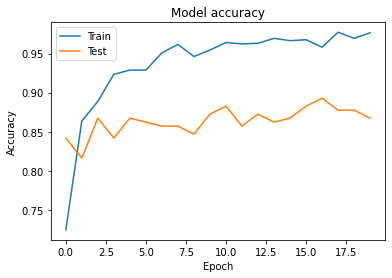

'import tensorflow as tf\nimport keras_preprocessing\nfrom keras_preprocessing import image\nfrom keras_preprocessing.image import ImageDataGenerator\nimport os\nos.chdir(\'C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\\')\n\nTRAINING_DIR = "Train"\ntraining_datagen = ImageDataGenerator(rescale=1./255,\nzoom_range=0.15,\nhorizontal_flip=True,\nfill_mode=\'nearest\')\nVALIDATION_DIR = "Test"\nvalidation_datagen = ImageDataGenerator(rescale = 1./255)\ntrain_generator = training_datagen.flow_from_directory(\nTRAINING_DIR,\ntarget_size=(224,224),\nshuffle = True,\nclass_mode=\'categorical\',\nbatch_size = 128)\nvalidation_generator = validation_datagen.flow_from_directory(\nVALIDATION_DIR,\ntarget_size=(224,224),\nclass_mode=\'categorical\',\nshuffle = True,\nbatch_size= 14)\n\n\n# os.environ["CUDA_VISIBLE_DEVICES"] = \'1\'\nfrom tensorflow.keras.applications import *\n# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)\n# vgg16 = VGG16(weig

In [7]:

# from tensorflow.keras import backend as K

# def precision(y_true, y_pred):
#     """Precision metric.

#     Only computes a batch-wise average of precision.

#     Computes the precision, a metric for multi-label classification of
#     how many selected items are relevant.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision


# def recall(y_true, y_pred):
#     """Recall metric.

#     Only computes a batch-wise average of recall.

#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall


# def f1(y_true, y_pred):
#     def recall(y_true, y_pred):
#         """Recall metric.

#         Only computes a batch-wise average of recall.

#         Computes the recall, a metric for multi-label classification of
#         how many relevant items are selected.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

#     def precision(y_true, y_pred):
#         """Precision metric.

#         Only computes a batch-wise average of precision.

#         Computes the precision, a metric for multi-label classification of
#         how many selected items are relevant.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision
#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))



# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = 'imagenet', input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_vgg_201008.h5')

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


"""import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
# base_model = InceptionV3(input_tensor=input_tensor, weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_resnet_201008.h5')


import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




# from google.colab import drive

# drive.mount('/content/drive/')

# import sys
# import os
# os.chdir('/content/drive/My Drive/test/Dataset 3')


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Dataset 3\\')

TRAINING_DIR = "Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_inception_201008.h5')



import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""

In [4]:

from tensorflow.keras import backend as K

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.keras.applications import *
# resnet = ResNet50(weights = None, input_shape = input_tensor, include_top = False)
# vgg16 = VGG16(weights = None, input_shape = input_tensor, include_top = False)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
#base_model = VGG16(input_tensor=input_tensor, weights=None, include_top=False)
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['acc',f1,precision, recall])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

from tensorflow.keras.models import load_model

model.save('f_inception_201008.h5')

Train for 14 steps, validate for 14 steps
Epoch 1/20
 4/14 [=======>......................] - ETA: 1:32 - loss: 2.3138 - acc: 0.5684 - f1: 0.5589 - precision: 0.5589 - recall: 0.5589WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 280 batches). You may need to use the repeat() function when building your dataset.


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import os
os.chdir('C:\\Users\\knit\\Downloads\\fire-detection-master\\Datasets 1-2\\')
TRAINING_DIR = "Training"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
VALIDATION_DIR = "Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 280)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 14)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [5]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 15,
epochs = 20,
validation_data = validation_generator,
validation_steps = 15
)

Train for 15 steps, validate for 15 steps
Epoch 1/20
15/15 [==============================] - 29s 2s/step - loss: 0.5151 - acc: 0.7238 - val_loss: 0.3816 - val_acc: 0.8619
Epoch 2/20
15/15 [==============================] - 29s 2s/step - loss: 0.3507 - acc: 0.8504 - val_loss: 0.2994 - val_acc: 0.9079
Epoch 3/20
15/15 [==============================] - 29s 2s/step - loss: 0.2591 - acc: 0.9050 - val_loss: 0.2512 - val_acc: 0.9372
Epoch 4/20
15/15 [==============================] - 28s 2s/step - loss: 0.2293 - acc: 0.9219 - val_loss: 0.2130 - val_acc: 0.9414
Epoch 5/20
15/15 [==============================] - 28s 2s/step - loss: 0.2317 - acc: 0.9050 - val_loss: 0.2137 - val_acc: 0.9414
Epoch 6/20
15/15 [==============================] - 29s 2s/step - loss: 0.2249 - acc: 0.9127 - val_loss: 0.2240 - val_acc: 0.9372
Epoch 7/20
15/15 [==============================] - 29s 2s/step - loss: 0.2023 - acc: 0.9236 - val_loss: 0.2071 - val_acc: 0.9289
Epoch 8/20
15/15 [==============================

In [6]:

from tensorflow.keras.models import load_model

model.save('f_cnn.h5')